##              Task-1          Prediction using Supervised ML



Author - Aditya Gupta

Submitted To - The Sparks Foundation

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Data

In [2]:
path = "http://bit.ly/w-data"
df = pd.read_csv(path)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Describing and gaining valuable insights from the data.

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Plotting the data
We are plotting a Scatter plot to study the relationship between Hours and Score.

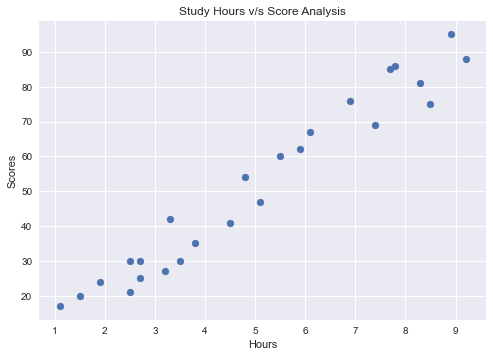

In [5]:
plt.style.use('seaborn')
plt.scatter(df.Hours,df.Scores)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Study Hours v/s Score Analysis')
plt.show()

As seen from the plot, this data can be plotted as a regression data.
Here, the independable variable, X is the Hours and the dependent variable is Y, Scores.

In [6]:
X = df['Hours'].to_numpy().reshape(-1,1)
Y = df['Scores'].to_numpy().reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split
x_,x_test,y_,y_test = train_test_split(X,Y,random_state = 2)

### Training and Testing the Model

Importing the Model

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_ ,y_)

LinearRegression()

Predicting for the test data

In [9]:
y_pred = reg.predict(x_test)

df = pd.DataFrame({'Actual': y_test.reshape(-1), 'Predicted': y_pred.reshape(-1)})  
df

,Actual,Predicted
0,17,11.834506
1,21,26.238501
2,24,20.065360
3,88,95.171907
4,76,71.508200
5,25,28.296215
6,75,87.969909


Calculating the Accuracy

In [10]:
acc = reg.score(x_test,y_test)
print('Accuracy is', acc*100,'%')

Accuracy is 94.56536786570634 %


Testing for Custom Data

In [11]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = reg.predict(hours)
print("No of Hours:",hours)
print("Predicted Score:",own_pred)

No of Hours: [[9.25]]
Predicted Score: [[95.68633495]]


### Plotting the Regression Curve
We are plotting the regression curve (line in our case) to visaualize how dependent variable changes with the independent one.

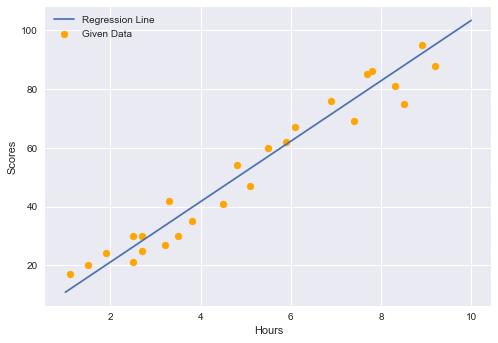

In [12]:
plt.scatter(X,Y,color= 'Orange',label = 'Given Data')
plt.xlabel('Hours')
plt.ylabel('Scores')
sample = np.linspace(1,10).reshape(-1,1)
plt.plot(sample,reg.predict(sample),label = 'Regression Line')
plt.legend()
plt.show()

### Evaluating the Model
We are using mean-sqaured error to calculate the model's performance. The Model which gives us the least error is the most optimal one.

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 6.038352113472347
